<a href="https://colab.research.google.com/github/psaw/hse-ai24-ml/blob/main/Decision_tree_screencast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Посмотрим, как обучать решающие деревья в python.

In [ ]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

Будем предсказывать стоимость домов в Калифорнии.

In [ ]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Разобъем данные на тренировочную и тестовые части. Обучим дерево на трейне и оценим качество ($R^2$) на тесте.

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(Xtrain, ytrain)

DecisionTreeRegressor()

In [ ]:
from sklearn.metrics import r2_score

pred = model.predict(Xtest)

r2_score(ytest, pred)

0.6063899312713332

In [ ]:
pred_train = model.predict(Xtrain)

r2_score(ytrain, pred_train)

1.0

Дерево сильно переобучилось!

Попробуем ограничить его по глубине.

2 0.45120526546918793 0.43088594895460397
5 0.6307083244816962 0.6018796993971511
8 0.7551678130970392 0.6773917019147564
11 0.8675951235539243 0.6823334425127627
14 0.9446411229582562 0.6342542673815471
17 0.9828104995385228 0.6153400385190058
20 0.995943271035502 0.6003357760843702
23 0.9991749479711821 0.6129695443969002
26 0.9999171373512237 0.6020642595680736


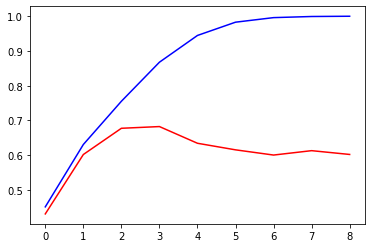

In [ ]:
from matplotlib import pyplot as plt

train_scores = []
test_scores = []

for depth in [2, 5, 8, 11, 14, 17, 20, 23, 26]:
    model = DecisionTreeRegressor(max_depth = depth)
    model.fit(Xtrain, ytrain)

    pred_train = model.predict(Xtrain)
    pred_test = model.predict(Xtest)

    train_r2 = r2_score(ytrain, pred_train)
    test_r2 = r2_score(ytest, pred_test)

    train_scores.append(train_r2)
    test_scores.append(test_r2)

    print(depth, train_r2, test_r2)

plt.plot(train_scores, color='blue')
plt.plot(test_scores, color='red')
plt.show()

Кросс-валидация

Судя по результатам эксперимента, оптимальная глубина дерева max_depth = 8. Но это мы узнали по конкретному разбиению на train-test.

Чтобы не привязываться к конкретному разбиению, можно посмотреть качество модели по кросс-валидации.

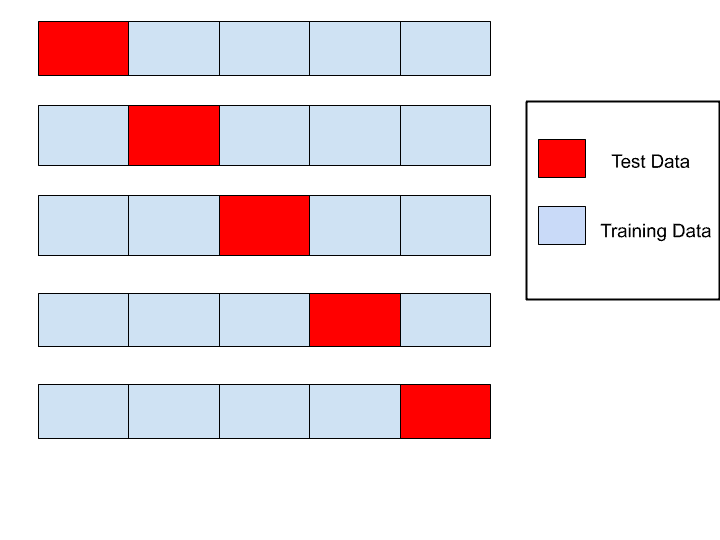

In [ ]:
from sklearn.model_selection import cross_val_score

model = DecisionTreeRegressor(max_depth = 8)

cross_val_score(model, X, y, cv=3, scoring='r2')

array([0.47540077, 0.60502879, 0.46807216])

In [ ]:
cross_val_score(model, X, y, cv=3, scoring='r2').mean()

0.5158897937379974

Решающее дерево можно визуализировать.

Это очень удобно для интерпретации результатов.

In [ ]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(Xtrain, ytrain)

DecisionTreeRegressor(max_depth=3)

In [ ]:
!pip install -q dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 KB 5.1 MB/s eta 0:00:00


In [ ]:
import dtreeviz

viz_model = dtreeviz.model(model, Xtrain, ytrain,
                           feature_names=Xtrain.columns)

viz_model.view(fancy = False, scale = 2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
